In [1]:
# PyTorch Computer Vision libraries
# torchvision.datasets- get datasets and dataloading functions for CV
#torch.models- get pretrained CV models that can leverage for your own problems
# torch.utils.data.Datasets-  functions for manipulating yoour vision data/ images to suitable  for use 
#torch.utils.data.DataSet-Base dataset class for PyTorch
#torch.utils.data.DataLoader- creates a python iterable over a datset

import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Checkversions
print(torch.__version__)
print(torch.__version__)



2.6.0+cpu
2.6.0+cpu


In [2]:
# Getting a dataset-FashionMNIST
from torchvision import datasets
# Setup the training data
train_data=datasets.FashionMNIST(
    root="data", # where to download datat to
    train=True, #  do we want the training dataset?
    download=True, # do we want to download yes/no? 
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
    )

test_data=datasets.FashionMNIST(
    root="data", # where to download datat to
    train=False, #  do we want the training dataset?
    download=True, # do we want to download yes/no? 
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# See the first training data example
image,label=train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
#Check the shape of theimage
print(f"Image shape:{image.shape}->[color_channels,height,width]")
print(f"Image label:{class_names[label]}")

Image shape:torch.Size([1, 28, 28])->[color_channels,height,width]
Image label:Ankle boot


Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

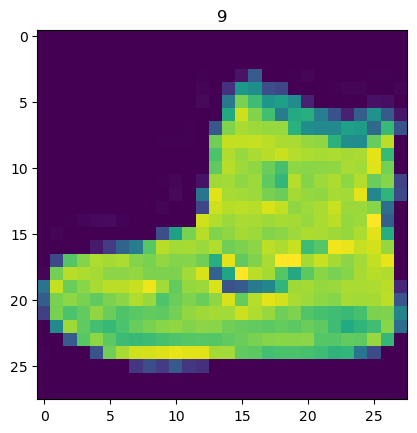

In [9]:
# visulize the data
import matplotlib.pyplot as plt
image,label=train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
#image

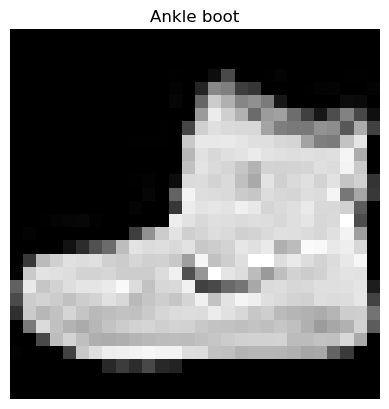

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

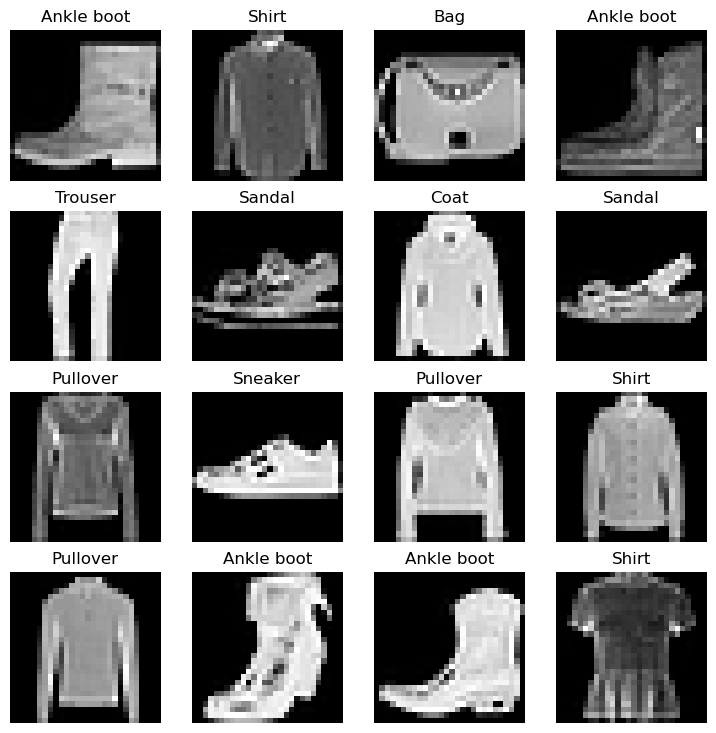

In [11]:
# plot more images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1, rows*cols+1):
   # print(i)
    random_idx=torch.randint(0, len(train_data), size=[1]).item()
    #print(random_idx)
    img, label=train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);
    

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
# Prepare DataLoader->DataLoader turns the dataset into a python iterable
from torch.utils.data import DataLoader

 # setup batch size hyperparameter
BATCH_SIZE=32

#turn datasets into a python iterable
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2789f027970>,
 <torch.utils.data.dataloader.DataLoader at 0x2789f0278e0>)

In [14]:
# Let's checkout the created dataloaders
print(f"DataLoaders:{train_dataloader,test_dataloader}")
print(f" Length of train_dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f" Length of test_dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}...")


DataLoaders:(<torch.utils.data.dataloader.DataLoader object at 0x000002789F027970>, <torch.utils.data.dataloader.DataLoader object at 0x000002789F0278E0>)
 Length of train_dataloader:1875 batches of 32...
 Length of test_dataloader:313 batches of 32...


In [15]:
# Checkout what is inside the training dataloder
train_features_batch,train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:8, label size:torch.Size([])


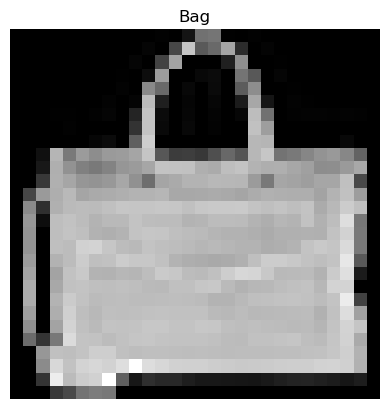

In [16]:
# Show sample visualization of BS
#torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch), size=[1]).item()
img, label=train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label:{label}, label size:{label.shape}")

In [17]:
# Build the a baseline model-a simple modelwill try and improve upon with subsequent models or experiments
#Create a flatten layer
flatten_model=nn.Flatten()

# Get a single sample
x=train_features_batch[0]
#x.shape

# flatten the sample
output=flatten_model(x) # perform forward pass

# print the output
print(f"Shape before flattening:{x.shape}->[Coler_channels,height,width]")
print(f"Shape afterflattening:{output.shape}->[Coler_channels,height*width]")


Shape before flattening:torch.Size([1, 28, 28])->[Coler_channels,height,width]
Shape afterflattening:torch.Size([1, 784])->[Coler_channels,height*width]


In [18]:
# from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
      super().__init__()
      self.layer_stack=nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=input_shape,
                    out_features=hidden_units),
          nn.Linear(in_features=hidden_units,
                    out_features=output_shape)
      )

    def forward(self,x):
        return self.layer_stack(x)
        
                 
                 

In [19]:
torch.manual_seed(42)

#Setup model with input parameters
model_0=FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10 , # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [22]:
 # Setup loss, optimizer and evaluation metrics
 #Setup loss function
loss_fn=nn.CrossEntropyLoss()
# Setup optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)# lr-hyperparameters

In [23]:
loss_fn
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [24]:
# Calculate accuracy (a classification metric)


def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

# Example usage
y_true = torch.tensor([0, 1, 2, 3])
y_pred = torch.tensor([0, 2, 1, 3])

accuracy = accuracy_fn(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}%")



Accuracy: 50.00%


In [25]:
# Creating a function to time our experiment
from timeit  import  default_timer as timer
def print_train_time(start:float,
                     end: float,
                     device: torch.device=None):
    total_time=end-start
    print(f"Train time on{device}:{total_time:.3f} seconds")
    return total_time

In [26]:
start_time=timer()
end_time=timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time oncpu:0.000 seconds


2.8799999995499093e-05

In [27]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

# --- assume model_0, loss_fn, optimizer,
#     train_dataloader and test_dataloader are defined above

torch.manual_seed(42)

epochs = 3
train_time_start_on_cpu = timer()

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}\n" + "-"*20)

    # --- TRAINING ---
    train_loss = 0.0
    model_0.train()
    for batch_idx, (X, y) in enumerate(tqdm(train_dataloader, desc="Training")):
        # forward
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

        # print progress every 400 batches (optional)
        if (batch_idx + 1) % 400 == 0:
            seen = (batch_idx + 1) * X.size(0)
            total = len(train_dataloader.dataset)
            print(f"  Trained on {seen}/{total} samples")

    train_loss /= len(train_dataloader)
    print(f"-> Average training loss: {train_loss:.4f}")

    # --- TESTING ---
    test_loss = 0.0
    test_acc  = 0.0
    model_0.eval()
    with torch.inference_mode():
        for X, y in tqdm(test_dataloader, desc="Testing"):
            preds = model_0(X)
            loss = loss_fn(preds, y)
            test_loss += loss.item()

            # compute accuracy
            pred_labels = preds.argmax(dim=1)
            acc = accuracy_fn(y_true=y, y_pred=pred_labels)
            test_acc += acc

    test_loss /= len(test_dataloader)
    test_acc  /= len(test_dataloader)
    print(f"-> Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.2f}%")

# --- TOTAL TIME ---
train_time_end_on_cpu = timer()
total_train_time_model_0 = train_time_end_on_cpu - train_time_start_on_cpu
print(f"\nTotal training time: {total_train_time_model_0:.2f} seconds")




Epoch 1/3
--------------------


Training:   0%|          | 0/1875 [00:00<?, ?it/s]

  Trained on 12800/60000 samples
  Trained on 25600/60000 samples
  Trained on 38400/60000 samples
  Trained on 51200/60000 samples
-> Average training loss: 0.9094


Testing:   0%|          | 0/313 [00:00<?, ?it/s]

-> Test loss: 0.6323 | Test accuracy: 78.49%

Epoch 2/3
--------------------


Training:   0%|          | 0/1875 [00:00<?, ?it/s]

  Trained on 12800/60000 samples
  Trained on 25600/60000 samples
  Trained on 38400/60000 samples
  Trained on 51200/60000 samples
-> Average training loss: 0.5572


Testing:   0%|          | 0/313 [00:00<?, ?it/s]

-> Test loss: 0.5461 | Test accuracy: 81.08%

Epoch 3/3
--------------------


Training:   0%|          | 0/1875 [00:00<?, ?it/s]

  Trained on 12800/60000 samples
  Trained on 25600/60000 samples
  Trained on 38400/60000 samples
  Trained on 51200/60000 samples
-> Average training loss: 0.5026


Testing:   0%|          | 0/313 [00:00<?, ?it/s]

-> Test loss: 0.5455 | Test accuracy: 80.06%

Total training time: 22.25 seconds


In [28]:
#  Make predictions  and model results
import torch

def eva_model(
    model: torch.nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    accuracy_fn
) -> dict:
    """
    Returns a dict containing the results of model predictions on data_loader.
    """
    # Initialize accumulators as Python floats
    total_loss = 0.0
    total_acc  = 0.0

    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions
            y_pred = model(X)

            # Accumulate batch loss & accuracy
            batch_loss = loss_fn(y_pred, y).item()
            total_loss += batch_loss

            batch_acc = accuracy_fn(
                y_true=y,
                y_pred=y_pred.argmax(dim=1)
            )
            total_acc += batch_acc

    # Compute the average loss & accuracy over all batches
    avg_loss = total_loss / len(data_loader)
    avg_acc  = total_acc  / len(data_loader)

    return {
        "model_name": model.__class__.__name__,
        "model_loss": avg_loss,
        "model_acc" : avg_acc
    }

# Example call—make sure the function name matches:
model_0_results = eva_model(
    model=model_0,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5454752078166785,
 'model_acc': 80.06190095846645}

In [29]:
# Build a model with non-linearity
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.layer_stack=nn.Sequential(
            nn.Flatten(), # flatten inputs into a single vector
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
                      nn.ReLU()

                     )
        def forward(self, x:torch.Tensor):
            return self.layer_stack(x)
            
        


In [30]:
next(model_0.parameters()).device

device(type='cpu')

In [31]:
## create an instance of model_1


# 1. Make sure you’ve defined your device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. (Re)define your class names so len(class_names) works
class_names = [str(i) for i in range(10)]  # e.g. for FashionMNIST

# 3. Seed for reproducibility
torch.manual_seed(42)

# 4. Instantiate and move model to device
model_1 = FashionMNISTModelV1(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

# 5. Check the device of the model’s parameters
print(next(model_1.parameters()).device)


cpu


In [32]:
# Setup loss, optimizer and evaluation metrics
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(), # tries to update model parameters
                          lr=0.1)


In [33]:
def train_step(model: torch.nn.Module,
               train_dataloader: torch.utils.data.DataLoader,
               test_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):

    from timeit import default_timer as timer
    from tqdm.auto import tqdm

    train_time_start_on_cpu = timer()

    # --- TRAINING ---
    model.train()
    train_loss = 0.0
    train_acc  = 0.0

    for batch_idx, (X, y) in enumerate(tqdm(train_dataloader, desc="Training")):
        X, y = X.to(device), y.to(device)

        # forward
        y_pred = model(X)
        loss = loss_fn(y_pred, y)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    train_loss /= len(train_dataloader)
    train_acc  /= len(train_dataloader)
    print(f"-> Train loss: {train_loss:.4f} | Train accuracy: {train_acc:.2f}%")

    # --- TESTING ---
    model.eval()
    test_loss = 0.0
    test_acc  = 0.0
    with torch.inference_mode():
        for X, y in tqdm(test_dataloader, desc="Testing"):
            X, y = X.to(device), y.to(device)
            preds = model(X)
            loss = loss_fn(preds, y)

            test_loss += loss.item()
            test_acc += accuracy_fn(y_true=y, y_pred=preds.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc  /= len(test_dataloader)
    print(f"-> Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.2f}%")

    # --- TOTAL TIME ---
    train_time_end_on_cpu = timer()
    total_train_time = train_time_end_on_cpu - train_time_start_on_cpu
    print(f"\nTotal training time: {total_train_time:.2f} seconds")


# ✅ Sample call (make sure these variables are defined earlier in your notebook/script):
train_step(model=model_0,
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           loss_fn=loss_fn,
           optimizer=optimizer,
           accuracy_fn=accuracy_fn,
           device=device)


Training:   0%|          | 0/1875 [00:00<?, ?it/s]

-> Train loss: 0.5131 | Train accuracy: 81.41%


Testing:   0%|          | 0/313 [00:00<?, ?it/s]

-> Test loss: 0.5455 | Test accuracy: 80.06%

Total training time: 7.43 seconds


In [72]:
# Building  CNN model
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture inspired by TinyVGG.
    """
    def __init__(self, input_shape, hidden_units: int, output_shape: int):
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=output_shape)  # Assuming input image is 28x28
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        return x


In [80]:
image.shape

torch.Size([1, 28, 28])

In [88]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)  # Just keep it as integer
).to(device)  # Now move the model to device


In [99]:
# Stepping via nn.conv2d()
torch.manual_seed(42)
# Create a batch of images
images=torch.randn(size=(32,3,64,64))
test_image=image[0]
print(f"Image batch shape:{images.shape}")
print(f" Single Imageshape:{test_image.shape}")
print(f"Test image:\n {test_image}")
                   

Image batch shape:torch.Size([32, 3, 64, 64])
 Single Imageshape:torch.Size([28, 28])
Test image:
 tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.00

In [95]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [111]:
test_image.unsqueeze(0).shape

torch.Size([1, 28, 28])

In [97]:
test_image.shape

torch.Size([28, 28])

In [115]:
# Create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=1,
                     out_channels=10,
                     kernel_size=(3,3),
                     stride=1,
                     padding=0)
# pass the data via the convolutional layer
conv_output=conv_layer(test_image.unsqueeze(0))
conv_output

tensor([[[ 0.1242,  0.1242,  0.1242,  ...,  0.1242,  0.1242,  0.1242],
         [ 0.1242,  0.1242,  0.1242,  ...,  0.1245,  0.1256,  0.1244],
         [ 0.1242,  0.1242,  0.1242,  ...,  0.1271,  0.1225,  0.1268],
         ...,
         [ 0.1656,  0.1954,  0.1470,  ...,  0.2407,  0.0492, -0.1321],
         [ 0.1219,  0.1242,  0.1593,  ..., -0.0769, -0.0124,  0.0576],
         [ 0.1242,  0.1242,  0.1242,  ...,  0.1242,  0.1242,  0.1242]],

        [[ 0.2710,  0.2710,  0.2710,  ...,  0.2710,  0.2710,  0.2710],
         [ 0.2710,  0.2710,  0.2710,  ...,  0.2722,  0.2713,  0.2700],
         [ 0.2710,  0.2710,  0.2710,  ...,  0.2676,  0.2699,  0.2731],
         ...,
         [ 0.2252,  0.1286,  0.1659,  ...,  0.0613,  0.1178,  0.3330],
         [ 0.2725,  0.2710,  0.2311,  ...,  0.3200,  0.3207,  0.3130],
         [ 0.2710,  0.2710,  0.2710,  ...,  0.2710,  0.2710,  0.2710]],

        [[-0.3196, -0.3196, -0.3196,  ..., -0.3196, -0.3196, -0.3196],
         [-0.3196, -0.3196, -0.3196,  ..., -0